In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.dropna(inplace=True)

In [4]:
df.shape


(714, 3)

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x.head(2)

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833


In [10]:
clf=DecisionTreeClassifier()

In [11]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [12]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6331572769953051

In [14]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [15]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [16]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [17]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [18]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [19]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [20]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
321,27.0,6.0,7.8958,3.0,"(25.0, 28.0]","(7.775, 7.896]"
438,64.0,14.0,263.0000,14.0,"(54.0, 80.0]","(108.9, 512.329]"
749,31.0,8.0,7.7500,1.0,"(30.0, 32.0]","(7.25, 7.775]"
209,40.0,11.0,31.0000,10.0,"(38.0, 42.0]","(26.55, 31.275]"
130,33.0,9.0,7.8958,3.0,"(32.0, 35.0]","(7.775, 7.896]"


In [21]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred1=clf.predict(x_test_trf)

In [22]:
accuracy_score(y_test,y_pred1)

0.6363636363636364

In [23]:
x_trf=trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy'))

0.6723004694835681

In [27]:
def discretize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy=strategy)
    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    x_trf=trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy')))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before Age")
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("AfterAge")
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before Fare")
    
    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("After Fare")
    plt.show()
    

C:\Users\Riya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Riya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6556142410015648


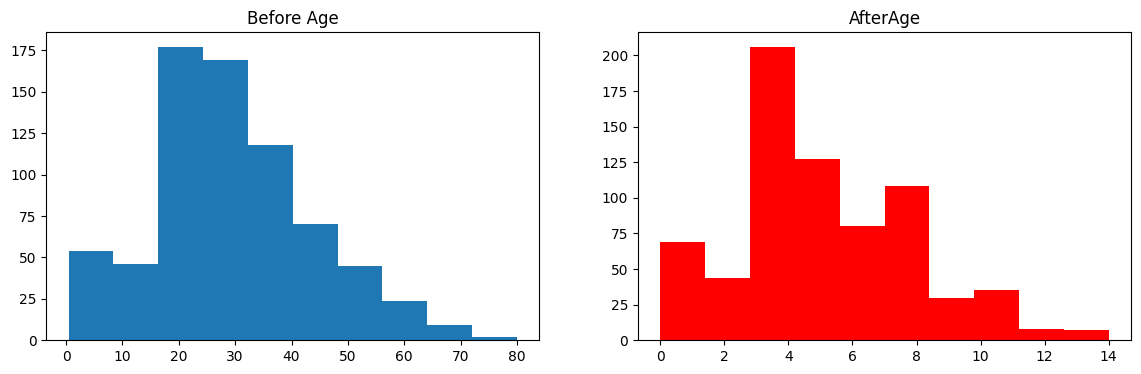

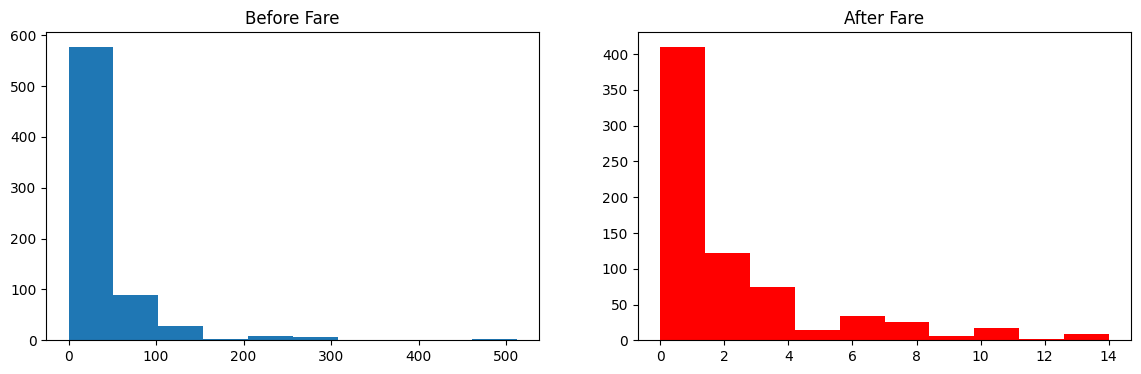

In [32]:
discretize(20,'kmeans')